# Outlier Detection: IQR Based Filtering (skewed distribution)

- You should apply the IQR Proximity rule if you have a skewed column that is not normally distributed. The data points out of the upper and lower limits can be considered outliers: either trim or cap.

`Interquartile Range: Q1 - 1.5 x IQR  <=  Acceptable Range <= Q3 - 1.5 x IQR`

`Outlier < Q1 - 1.5 x IQR   &  Outlier > Q3 + 1.5 x IQR`

Note: Box plot is only applicable for numerical columns.

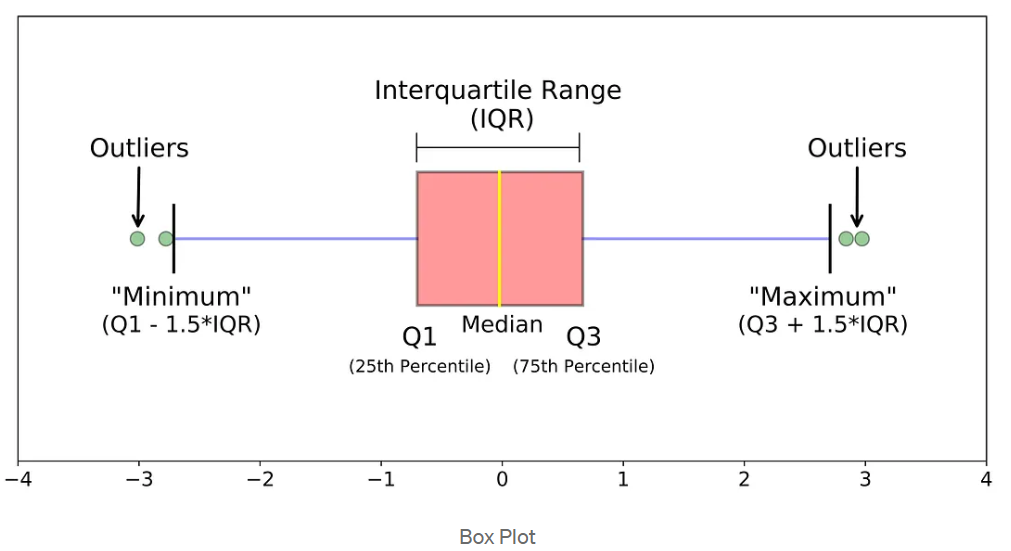

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("placement.csv")
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [7]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

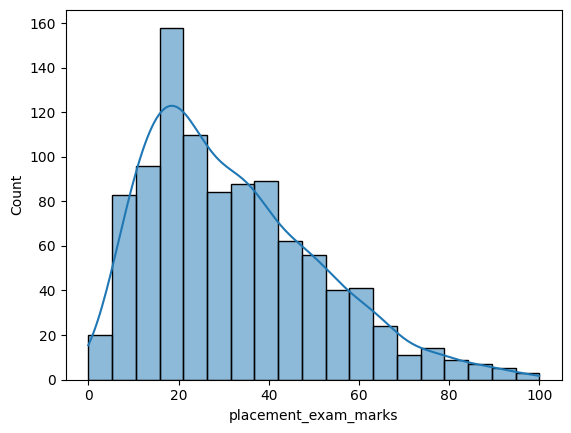

In [6]:
sns.histplot(kde=True, x=df['placement_exam_marks'])


In [10]:
marks = df['placement_exam_marks']
Q1 = marks.quantile(0.25)
Q3 = marks.quantile(0.75)
IQR = Q3 - Q1

<Axes: title={'center': 'Outliers in Shaded Region'}, xlabel='placement_exam_marks'>

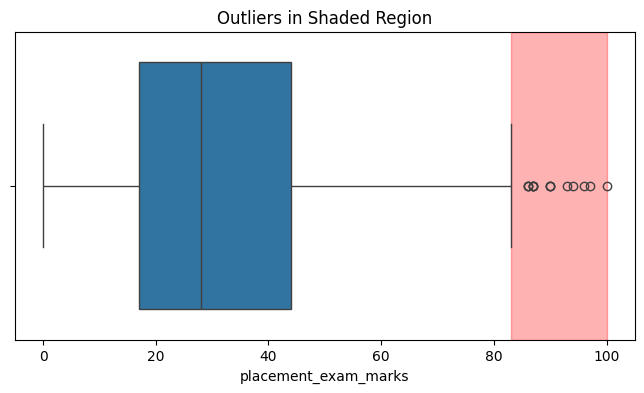

In [17]:
fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.axvspan(83,100, color='red',alpha=.3)
ax.set_title("Outliers in Shaded Region")
sns.boxplot(data=df, x='placement_exam_marks')

In [40]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit, upper_limit

(-23.5, 84.5)

In [22]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [23]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


## Solution1: Trimming

In [41]:
df1 = df.copy()
df1[ (df1['placement_exam_marks'] > lower_limit) & (df1['placement_exam_marks'] < upper_limit)]

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [43]:
# Error
# Orignal columns has 1000 rows and the right side operation results in 985 rows. Ucamptabitlity.
df1['placement_exam_marks'] = df1[ (df1['placement_exam_marks'] > lower_limit) & (df1['placement_exam_marks'] < upper_limit)]

ValueError: Columns must be same length as key

In [39]:
outliers = df1[(df1['placement_exam_marks'] < lower_limit) | (df1['placement_exam_marks']> upper_limit)]
outliers

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [44]:
# Creating a new dataframe by filtering (i.e., removing the outliers.)
df2  =  df1[ (df1['placement_exam_marks'] > lower_limit) & (df1['placement_exam_marks'] < upper_limit)]
df2

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: xlabel='placement_exam_marks'>

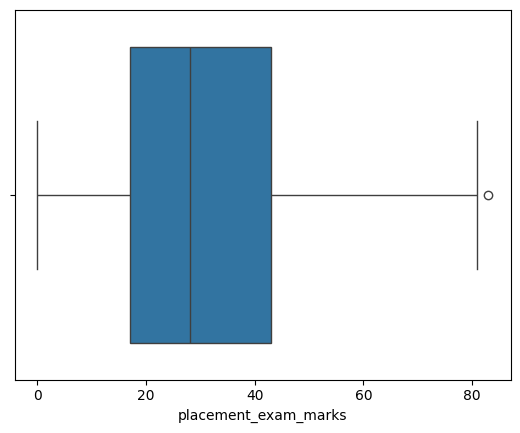

In [45]:
sns.boxplot(data=df2,x='placement_exam_marks')

## Capping

In [52]:
df3 = df.copy()
# In this case we can assign. Rows after capping will be the same as original.
df3['placement_exam_marks'] = np.where(df3['placement_exam_marks'] > upper_limit,
                                                                    upper_limit,
                                            np.where(df3['placement_exam_marks']<lower_limit, lower_limit, df3['placement_exam_marks']))

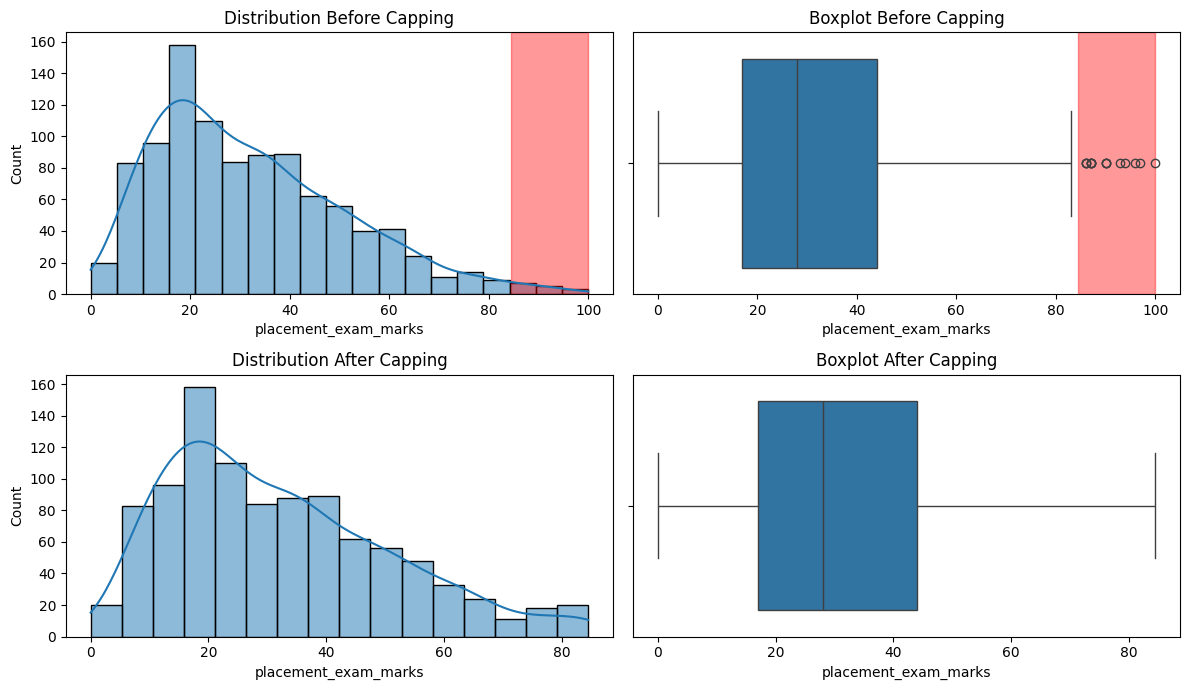

In [59]:
fig, (ax1, ax2) = plt.subplots(2,2, figsize=(12,7))

ax1[0].set_title("Distribution Before Capping")
sns.histplot(kde=True,x=df['placement_exam_marks'],ax=ax1[0])
ax1[0].axvspan(upper_limit, df['placement_exam_marks'].max(), color='red',alpha=.4)

ax1[1].set_title("Boxplot Before Capping")
sns.boxplot(data=df, x='placement_exam_marks',ax=ax1[1])
ax1[1].axvspan(upper_limit,df['placement_exam_marks'].max(),color='red',alpha=.4)


ax2[0].set_title("Distribution After Capping")
sns.histplot(kde=True,x=df3['placement_exam_marks'],ax=ax2[0])

ax2[1].set_title("Boxplot After Capping")
sns.boxplot(data=df3, x='placement_exam_marks',ax=ax2[1])

plt.tight_layout()

